In [28]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [29]:
sim = 'phx256-1'
with open('/mnt/c/Users/azton/Projects/phoenix_analysis/%s/p2_origin_qtys.json'%sim,'r') as f:
    enr = json.load(f)

for k in enr.keys(): print(k) 

enrichee_pidx
enricher_pidx
enricher_mass
enrichee_metal
formation_dt
sne_dt
enricher_mean_z
enricher_min_z
enricher_max_z
distance
p3_stats


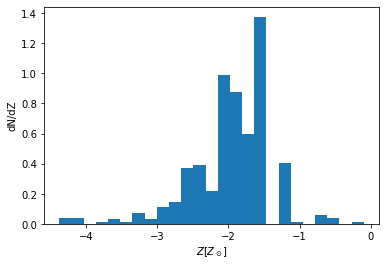

In [23]:
fig, ax = plt.subplots()
ax.hist(np.log10(enr['enrichee_metal'])-np.log10(0.02), bins=25, density=True)
ax.set_xlabel('$Z [Z_\odot$]')
ax.set_ylabel('dN/dZ')

plt.savefig('p2_origins/%s_p2_MDF.pdf'%sim)


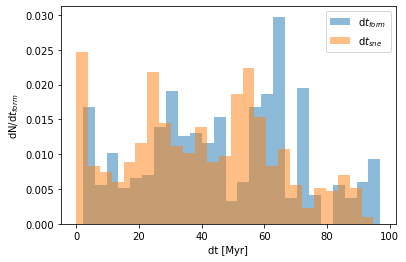

In [24]:
fig, ax = plt.subplots()
ax.hist(enr['formation_dt'], label='d$t_{form}$', bins=25, color='tab:blue', alpha=0.5, density=True)
ax.hist(enr['sne_dt'], label='d$t_{sne}$', bins=25, color='tab:orange', alpha=0.5, density=True)
ax.legend()
ax.set_xlabel('dt [Myr]')
ax.set_ylabel('dN/d$t_{form}$')

plt.savefig('p2_origins/%s_dt_toP2.pdf'%sim)


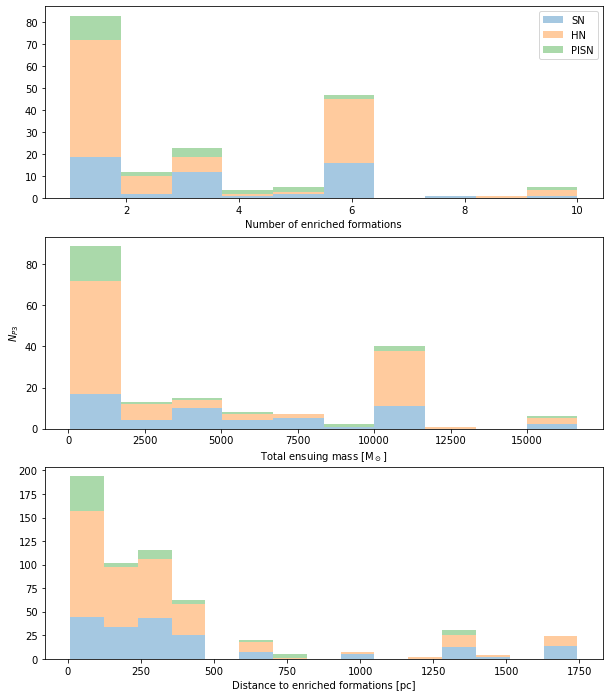

In [25]:

fig, ax = plt.subplots(3,1, figsize=(10,12))
# num_enr = []
# m_enr = []
# r_enr = []

num_sne = [[],[],[]]
m_sne = [[],[],[]]
r_sne = [[],[],[]]

for k in enr['p3_stats'].keys():
    # num_enr += [enr['p3_stats'][k]['n_enriched']]
    # m_enr += [enr['p3_stats'][k]['m_enriched']]
    # r_enr += [enr['p3_stats'][k]['r_enriched']]
    m = enr['p3_stats'][k]['mass']
    if (m > 11) and (m < 20):
        bin = 0
    elif (m >= 20) and (m < 40):
        bin = 1
    elif (m >=140) and (m < 260):
        bin = 2

    num_sne[bin].append(enr['p3_stats'][k]['n_enriched'])
    m_sne[bin].append(enr['p3_stats'][k]['m_enriched'])
    for rad in enr['p3_stats'][k]['r_enriched']:
        r_sne[bin].append(rad)



# ax[0][0].hist(num_enr, bins=10, label='N_{enriched}', density = False)
# ax[1][0].hist(m_enr, bins=10, label='Enriched Mass', density=False)
# ax[2][0].hist(r_enr, bins=15, label='Event distance', density=False)

sne_kind = {0:'SN', 1:'HN', 2:'PISN'}
# for type in [0,1,2]:
ax[0].hist(num_sne, bins=10, label=['SN','HN','PISN'], density=False, alpha=0.4, stacked=True)
ax[1].hist(m_sne, bins=10, density=False, alpha=0.4, stacked=True)
ax[2].hist(r_sne, bins=15, density=False, alpha=0.4, stacked=True)
ax[0].legend()
ax[0].set_xlabel('Number of enriched formations')
ax[1].set_xlabel('Total ensuing mass [M$_\odot$]')
ax[2].set_xlabel('Distance to enriched formations [pc]')
ax[1].set_ylabel('$N_{P3}$')

plt.savefig('p2_origins/%s_SNeffect.pdf'%sim)




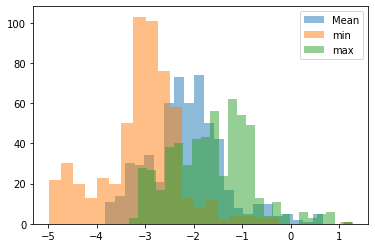

In [26]:
fig, ax = plt.subplots()

ax.hist(np.log10(enr['enricher_mean_z']), bins=25, alpha=0.5, label='Mean')
ax.hist(np.log10(enr['enricher_min_z']), bins=25, alpha=0.5, label='min')
ax.hist(np.log10(enr['enricher_max_z']), bins=25, alpha=0.5, label='max')
ax.legend()
plt.savefig('p2_origins/%s_zpathstat.pdf'%sim)


MultiPISN!
[0, 0, 1, 0, 0, 0, 2]


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SN'),
  Text(1, 0, 'HN'),
  Text(2, 0, 'PISN'),
  Text(3, 0, 'SN-HN'),
  Text(4, 0, 'SN-PISN'),
  Text(5, 0, 'HN-PISN'),
  Text(6, 0, 'SN-HN-PISN')])

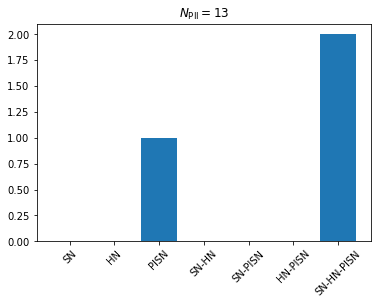

In [30]:
# plot sne, hne, pisn only enrichment
# sne-hne, sne-pisn, sne-hne, hne-pisn, sne-hne-pisn
labels = ['SN','HN','PISN','SN-HN','SN-PISN','HN-PISN','SN-HN-PISN']
counts = [0, 0, 0, 0, 0, 0, 0]

enrichers = []
n_formed = 0
for id in enr['enricher_mass'].keys():
    this_enr = [0,0,0]
    for m in enr['enricher_mass'][id]:
        n_formed += 1
        if m > 11 and m < 20:
            this_enr[0] += 1
        elif m >=20 and m < 40:
            this_enr[1] += 1
        elif m >140 and m < 260:
            this_enr[2] += 1
    if this_enr[2] > 0 and this_enr[0]==0 and this_enr[1] == 0:
        print('MultiPISN!')
    this_enr = [1 if i > 0 else 0 for i in this_enr]
    print(this_enr)
    if this_enr == [1,0,0]: # SNE
        counts[0] += 1
    elif this_enr == [0,1,0]: # HNE
        counts[1] += 1
    elif this_enr == [0,0,1]: # PISN
        counts[2] += 1
    elif this_enr == [1,1,0]: # SN+HN
        counts[3] += 1
    elif this_enr == [1,0,1]: # SN + PISN
        counts[4] += 1
    elif this_enr == [0, 1, 1]: # HN + PISN
        counts[5] += 1
    elif this_enr == [1,1,1]: # ALL
        counts[6] += 1
print(counts)
plt.figure()
plt.title('$N_{\\rm PII} = $%d'%n_formed)
plt.bar(range(len(labels)), counts, tick_label=labels)
plt.xticks(rotation=45)


